# OpenAI APIKEY 설정

In [3]:
import openai
import os

from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv())

openai.api_key  = os.getenv('ENV_OPENAI_API_KEY')

# 헬로월드

In [21]:
import pandas as pd
from pandasai import PandasAI

# Sample DataFrame
df = pd.DataFrame({
    "country": ["United States", "United Kingdom", "France", "Germany", "Italy", "Spain", "Canada", "Australia", "Japan", "China"],
    "gdp": [21400000, 2940000, 2830000, 3870000, 2160000, 1350000, 1780000, 1320000, 516000, 14000000],
    "happiness_index": [7.3, 7.2, 6.5, 7.0, 6.0, 6.3, 7.3, 7.3, 5.9, 5.0]
})

df

,country,gdp,happiness_index
0,United States,21400000,7.3
1,United Kingdom,2940000,7.2
2,France,2830000,6.5
3,Germany,3870000,7.0
4,Italy,2160000,6.0
5,Spain,1350000,6.3
6,Canada,1780000,7.3
7,Australia,1320000,7.3
8,Japan,516000,5.9
9,China,14000000,5.0


In [43]:
#| label: llm-code
# Instantiate a LLM
from pandasai.llm.openai import OpenAI
llm = OpenAI(api_token=openai.api_key,
             model="gpt-3.5-turbo",
             temperature=0)

pandas_ai = PandasAI(llm)
pandas_ai.run(df, prompt='Which are the 5 happiest countries?')

'According to the data, the top 5 happiest countries are the United States, Canada, Australia, United Kingdom, and Germany.'

In [27]:
top_5_values = df.nlargest(5, 'happiness_index')
top_5_values['country'].astype(str)

0     United States
6            Canada
7         Australia
1    United Kingdom
3           Germany
Name: country, dtype: object

# 시각화

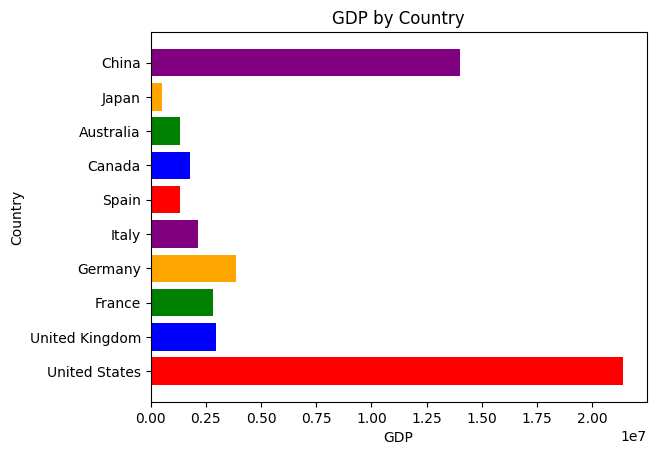

'Can you create a horizontal bar chart that displays the GDP of different countries, with each bar being a different color?'

In [37]:
# pandas_ai.run(df, prompt='plot the horizontal bar chart of gpd by all the country and sorted by gdp in a increasing order, using different colors for each bar')
pandas_ai.run(df, prompt='Plot the horizontal bar chart of countries showing for each the gpd, \
                          using different colors for each bar')

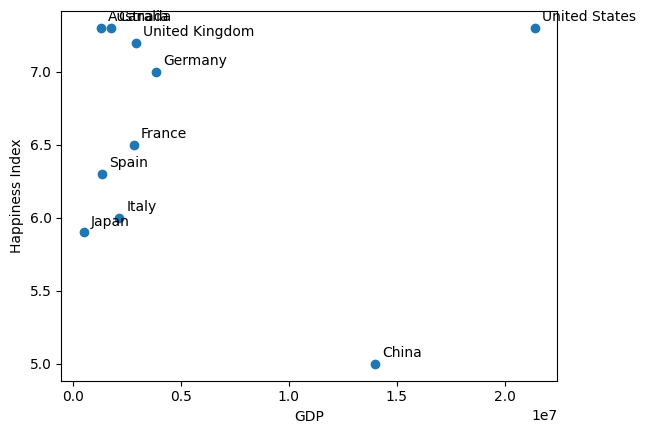

'Can you please create a scatter plot showing the relationship between GDP and happiness index, and label each point with the corresponding country name without overlapping?'

In [42]:
#| label: gdp-happy
pandas_ai.run(df, prompt='gdp와 happiness_index 두 변수간의 관계를 산점도로 그려주고 각 점과 겹치지 않게 조금 떨어져 country 라벨을 붙여서 시각화해주세요')